In [7]:
import pandas as pd
import requests

In [11]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-06-26 22:18:09--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-06-26 22:18:12--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: 'BostonHousing.csv'

     0K .......... .......... .......... .....                100%  975K=0.04s

2025-06-26 22:18:12 (975 KB/s) - 'BostonHousing.csv' saved [36242/36242]



In [12]:
df=pd.read_csv('BostonHousing.csv')

In [13]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [16]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [19]:
y=df.medv
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [22]:
x=df.drop(columns='medv',axis=1)
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [25]:
X_train.shape,Y_train.shape

((404, 13), (404,))

In [26]:
X_test.shape,Y_test.shape

((102, 13), (102,))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,Y_train)

LinearRegression()

In [31]:
y_pred=model.predict(X_test)

In [33]:
print("Coefficient: ",model.coef_)
print("Intercept: ",model.intercept_)
print("Mean squared Error (MSE): %.2f" % mean_squared_error(Y_test,y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(Y_test,y_pred))

Coefficient:  [-1.06940288e-01  5.26430490e-02  5.59194387e-02  2.30211129e+00
 -1.95885915e+01  3.50188836e+00  4.11712619e-03 -1.55393377e+00
  3.34523016e-01 -1.38932663e-02 -1.03290180e+00  9.18624222e-03
 -5.54434746e-01]
Intercept:  41.26338319931563
Mean squared Error (MSE): 24.22
Coefficient of determination (R^2): 0.67


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='medv'>

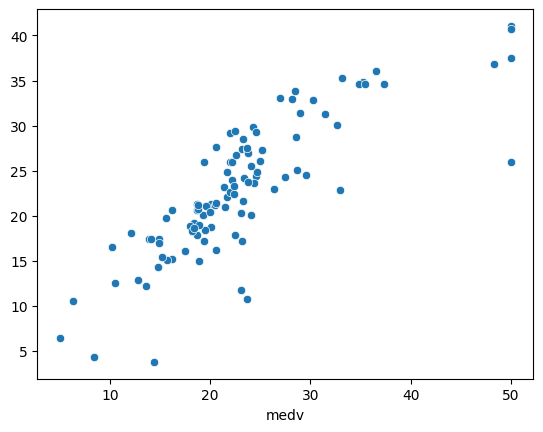

In [36]:
sns.scatterplot(x=Y_test,y=y_pred)

<AxesSubplot:xlabel='medv'>

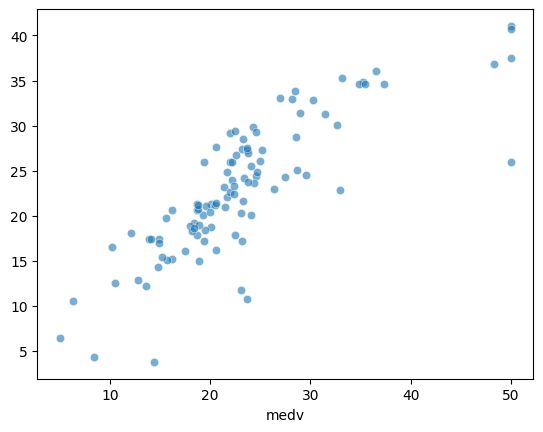

In [41]:
sns.scatterplot(x=Y_test,y=y_pred, alpha=0.6)

In [45]:
import pickle
filenames='BostonHousing.sav'
pickle.dump(model,(open(filenames,'wb')))

In [49]:
print('Accuracy: ', model.score(X_test,Y_test)*100)

Accuracy:  67.49207071341414
